Okay, let's see how this goes. Learning how to use Jupyter Notebooks and Numpy at the same time, should be fun. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

2.1 Plotting the Data

Reading in the data with np.genfromtxt, it's a "new" way to get data directly into a numpy array, efficient.


In [2]:
data1 = np.genfromtxt('ex1data1.txt', delimiter=',')
x = data1[:,0][np.newaxis].T
y = data1[:,1][np.newaxis].T

x = np.insert(x, 0, 1, axis=1)
print('x array has the shape: ' + str(x.shape))
print('y array has the shape: ' + str(y.shape))

x array has the shape: (97, 2)
y array has the shape: (97, 1)


Quick visualization of the training data.

Text(0, 0.5, 'Profit in $10,000s')

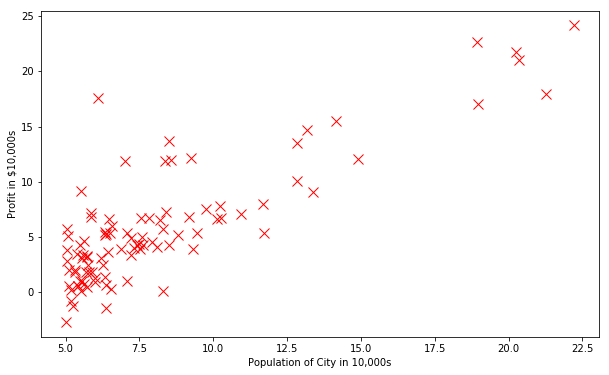

In [7]:
plt.figure(figsize=(10,6))
plt.plot(x[:,1], y,'rx',markersize=10)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

This graph isn't complete, but i spent quite a bit of time figuring out how to plot it in seaborn that i should just include it.

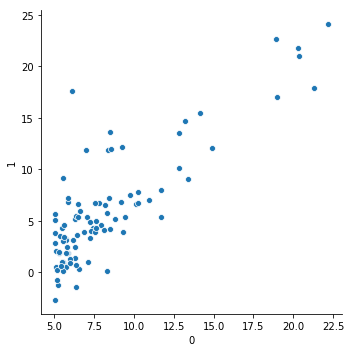

In [8]:
df = pd.DataFrame(data1)
df.head()
sns.relplot(x=0, y=1, data=df, )

2.2 Gradient Descent

Cost Function (MSE) & Linear hypothesis function

In [13]:
def compute_cost(x, y, theta):
    m = y.size
    J = 0
    h = np.dot(x, theta)
    J = 1/(2*m)*np.sum((h - y)**2)
    return J

In [14]:
test_initial = compute_cost(x, y, theta=[[0], [0]])
print(test_initial)

test_values = compute_cost(x, y, theta=[[-1], [2]])
print(test_values)

32.072733877455676
54.24245508201238


In [41]:
def gradient_descent(x, y, theta, alpha, num_iters):
    m = y.size
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = np.dot(x, theta)
        theta = theta - (alpha/m) * (x.T.dot(h - y))
        J_history.append(compute_cost(x, y, theta))
    return (theta, J_history)

(2, 1)
theta: [-3.63029144  1.16636235]


Text(0.5, 0, 'Iterations')

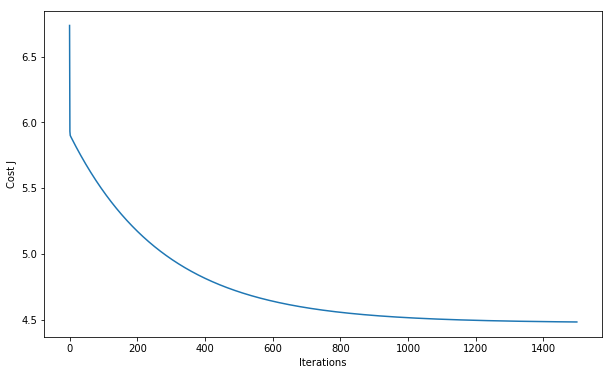

In [44]:
theta = [[0], [0]]

iterations = 1500
alpha = 0.01

theta, cost_J = gradient_descent(x, y, theta, alpha, iterations)
print(theta.shape)
print('theta:',theta.ravel())

plt.figure(figsize=(10,6))
plt.plot(cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations')


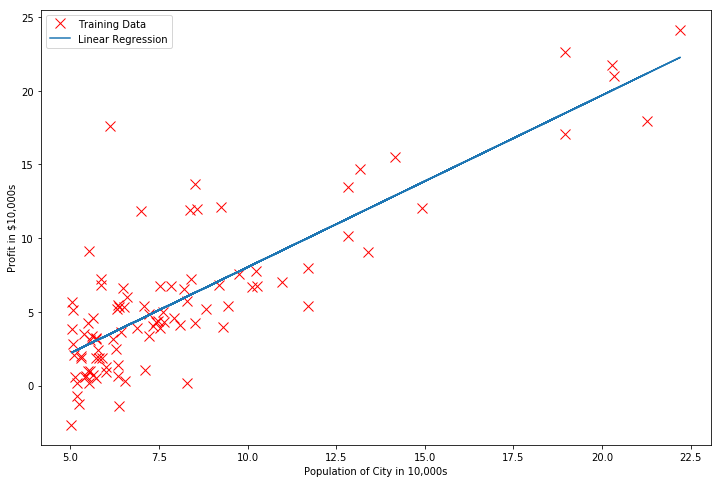

In [13]:
plt.figure(figsize=(12,8))
plt.plot(x[:,1], y,'rx',markersize=10)
plt.plot(x[:,1], np.dot(x, theta), '-')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(['Training Data', 'Linear Regression'])

Text(0.5, 0.92, 'Surface')

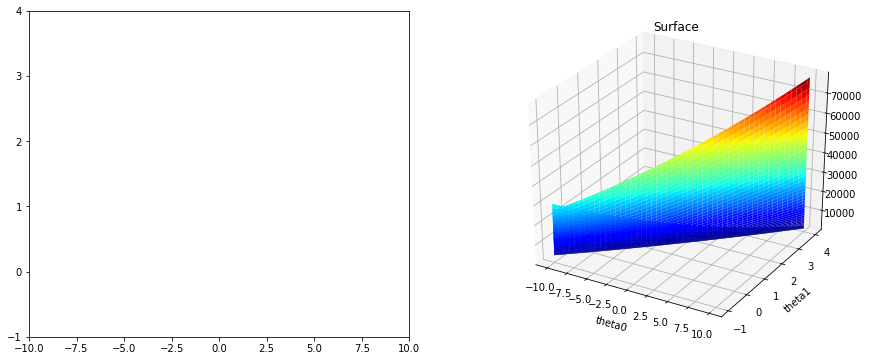

In [172]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)

J_val = np.zeros((len(theta0), len(theta1)))

for i, a in enumerate(theta0):
    for j, b in enumerate(theta1):
        J_val[i, j] = compute_cost(x, y, [a, b])

J_val = J_val.T

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')


ax1.contour(theta0, theta1, J_val, levels=np.logspace(-2, 3, 20), cmap=plt.cm.jet)

ax2.plot_surface(theta0, theta1, J_val, cmap = plt.cm.jet)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

Linear regression with multiple variables 

3.1 Feature normalization

In [59]:
data2 = np.genfromtxt('ex1data2.txt', delimiter=',')

x2 = data2[:, :2]
y2 = data2[:, -1][np.newaxis].T

x2.shape

(47, 2)

***Note to self: PLEASE remember to check the shape of the arrays. This will save me tons of headache down the line. Thanks

In [61]:
def feat_norm(x):
    x_norm = x.copy()
    
    mu = np.mean(x, axis=0)
    x_norm = np.subtract(x_norm, mu)
    
    sigma = np.std(x, axis=0)
    x_norm = np.divide(x_norm, sigma)
    
    return(x_norm, mu, sigma)

x_norm, mu, sigma = feat_norm(x2)
print('mean' + str(mu))
print('standard deviation' + str(sigma))

mean[2000.68085106    3.17021277]
standard deviation[7.86202619e+02 7.52842809e-01]


(47, 2)

Looking at the histogram we have normalized variables.

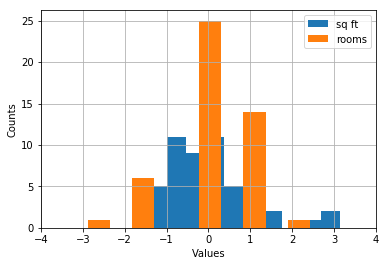

In [5]:
plt.grid(True)
plt.xlim([-4,4])
test = plt.hist(x_norm[:, 0], label = 'sq ft')
test = plt.hist(x_norm[:, 1], label = 'rooms')
plt.xlabel('Values')
plt.ylabel('Counts')
test = plt.legend()

Add column of 1s to x data

In [62]:
x_norm = np.insert(x_norm, 0, 1, axis=1)
x_norm.shape

(47, 3)

3.2 Gradient Descent

In [7]:
def h(x, theta):
    return np.dot(x, theta)

m=len(y2)
def compute_cost_m(x, y, theta):
    return (1./(2*m) * np.dot((h(x,theta)-y).T, (h(x,theta)-y)))

initial_theta = np.zeros((3,1))
print(compute_cost_m(x_norm, y2, initial_theta))

[[6.55915481e+10]]


In [9]:
def gradient_descent_m(x, y, theta, alpha, num_iters):
    m = y.size
    J2_history = []
    for i in range(num_iters):
        theta = theta - (alpha/m) * np.dot(x.T,(h(x,theta)-y))
        J2_history.append(compute_cost_m(x,y,theta))
    return(theta, J2_history)

In [14]:
alpha = 0.1
num_iters = 400

# init theta and run gradient descent
theta = np.zeros((3,1))


theta2, J2_history = gradient_descent_m(x_norm, y2, theta, alpha, num_iters)

J2_history_array = np.asarray(J2_history).reshape((400,1))

#print(J2_history_array)
print(theta2.ravel())


[340412.65957447 109447.79558639  -6578.3539709 ]


Text(0.5, 0, 'Iterations')

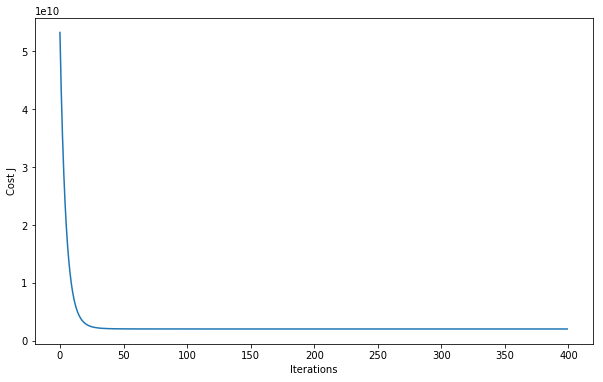

In [11]:
plt.figure(figsize=(10,6))
plt.plot(J2_history_array)
plt.ylabel('Cost J')
plt.xlabel('Iterations')

3.3 Normal Equations

In [123]:
data = np.loadtxt('ex1data2.txt', delimiter=',')
x3 = data[:, :2]
y3 = data[:, 2]
m3 = y3.size
x3 = np.concatenate([np.ones((m3, 1)), x3], axis=1)

(47, 3)


In [141]:
from numpy.linalg import inv
def norm_eq(x, y):
    theta = np.zeros(x.shape[1])
    sq = (np.dot(x.T, x))**-1
    ys = np.dot(x.T, y)
    theta = np.dot(sq, ys)
    return theta

simple = norm_eq(x3, y3)
print(simple)

[1.07579177e+06 5.03401587e+02 3.27409153e+05]


In [148]:
br3 = h([1,1650,3], simple)

print(br3)

2888631.8464142736
